<a href="https://colab.research.google.com/github/lie-42/2025-1-myclass-BDA/blob/main/inclass/10w_B_wed_0507_easy_ch08.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
!pip install koreanize_matplotlib

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.9/7.9 MB 67.4 MB/s eta 0:00:00


In [3]:
%config InlineBackend.figure_format = 'retina'

In [5]:
pd.set_option('display.precision',2)

In [6]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 24, done.
remote: Counting objects: 100% (24/24), done.
remote: Compressing objects: 100% (22/22), done.
remote: Total 24 (delta 4), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (24/24), 2.14 MiB | 4.37 MiB/s, done.
Resolving deltas: 100% (4/4), done.


In [8]:
mpg = pd.read_csv('data/mpg.csv')
mpg.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 234 entries, 0 to 233
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   manufacturer  234 non-null    object 
 1   model         234 non-null    object 
 2   displ         234 non-null    float64
 3   year          234 non-null    int64  
 4   cyl           234 non-null    int64  
 5   trans         234 non-null    object 
 6   drv           234 non-null    object 
 7   cty           234 non-null    int64  
 8   hwy           234 non-null    int64  
 9   fl            234 non-null    object 
 10  category      234 non-null    object 
dtypes: float64(1), int64(4), object(6)
memory usage: 20.2+ KB


In [10]:
mpg.isna().sum().sum()

np.int64(0)

In [32]:
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [8, 4]})

<Axes: xlabel='displ', ylabel='hwy'>

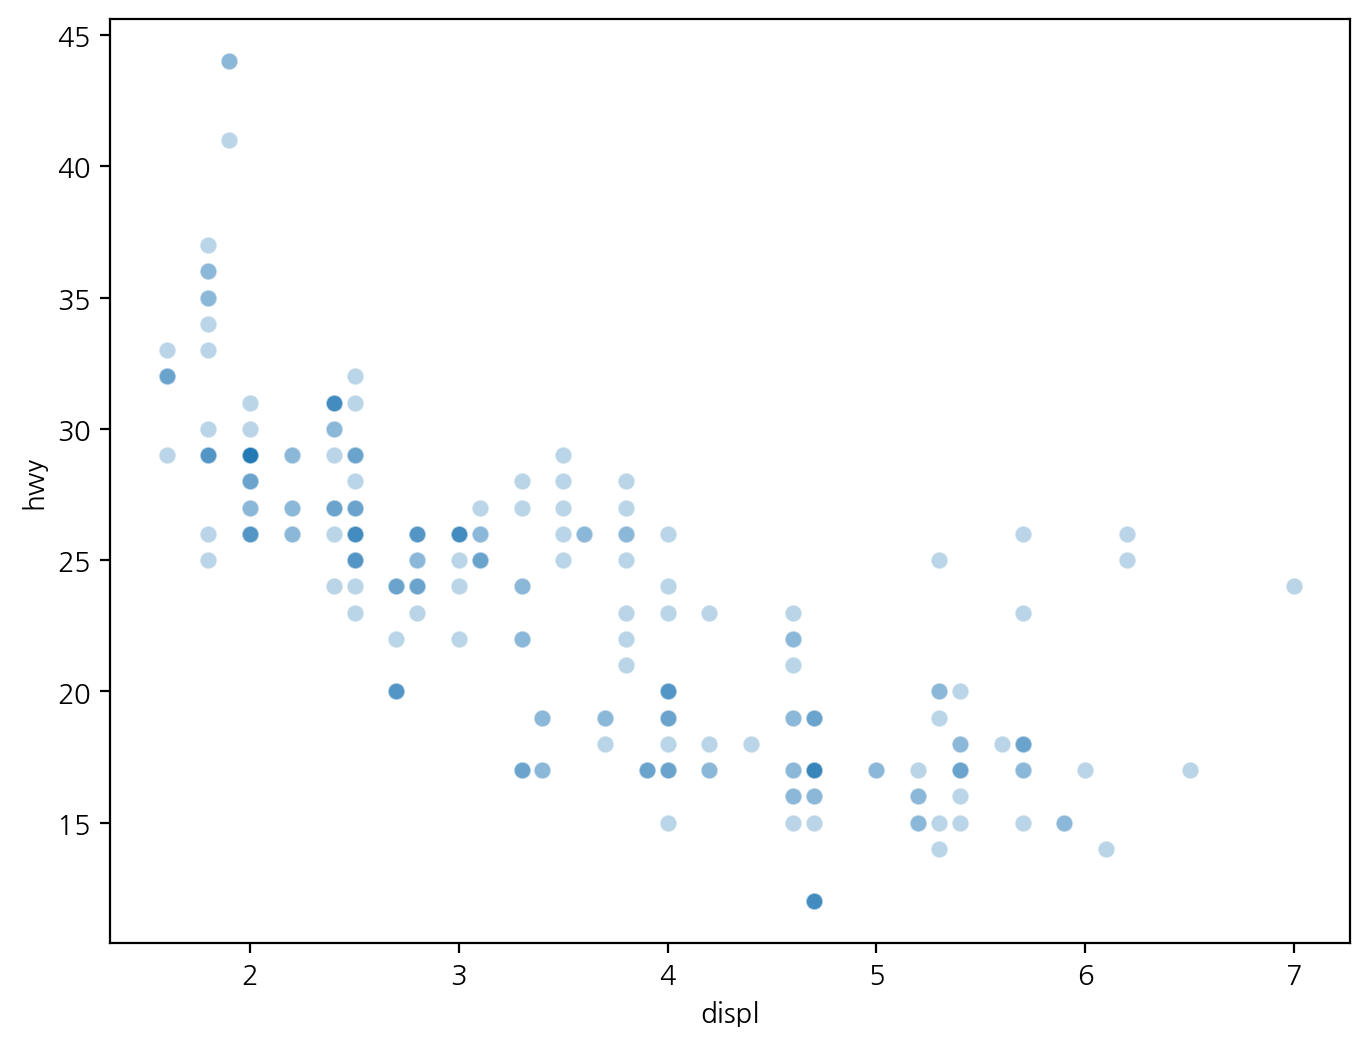

In [23]:
import koreanize_matplotlib

sns.scatterplot(data=mpg, x='displ',y='hwy', alpha=.3)

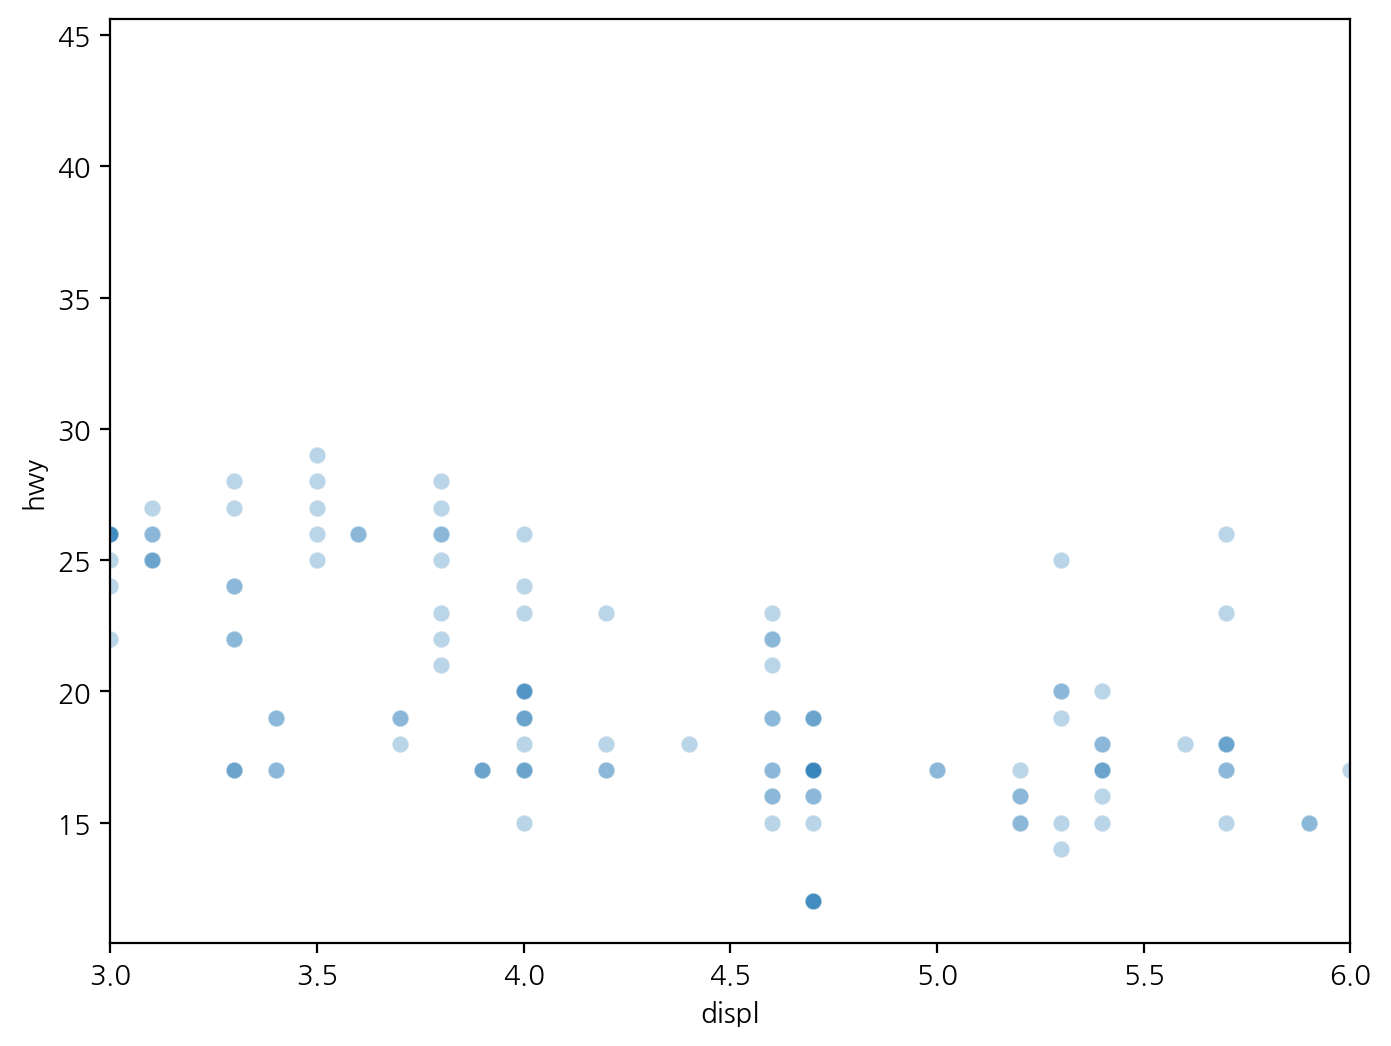

In [25]:
sns.scatterplot(data=mpg, x='displ',y='hwy', alpha=.3).set(xlim=[3,6]);

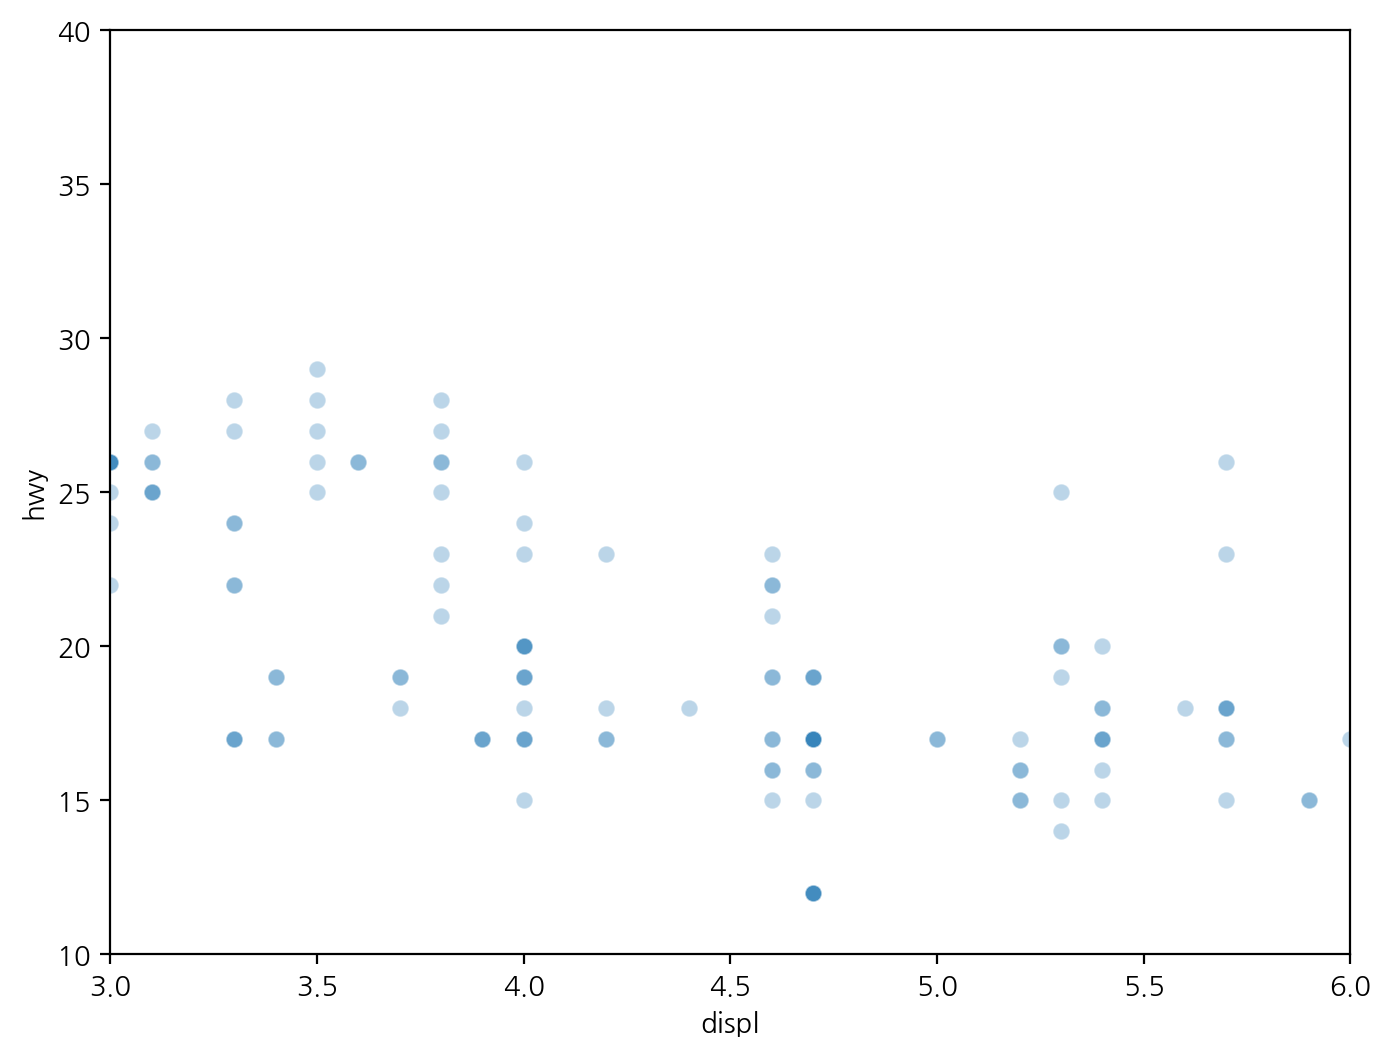

In [26]:
sns.scatterplot(data=mpg, x='displ',y='hwy', alpha=.3).set(xlim=[3,6], ylim=[10,40]);

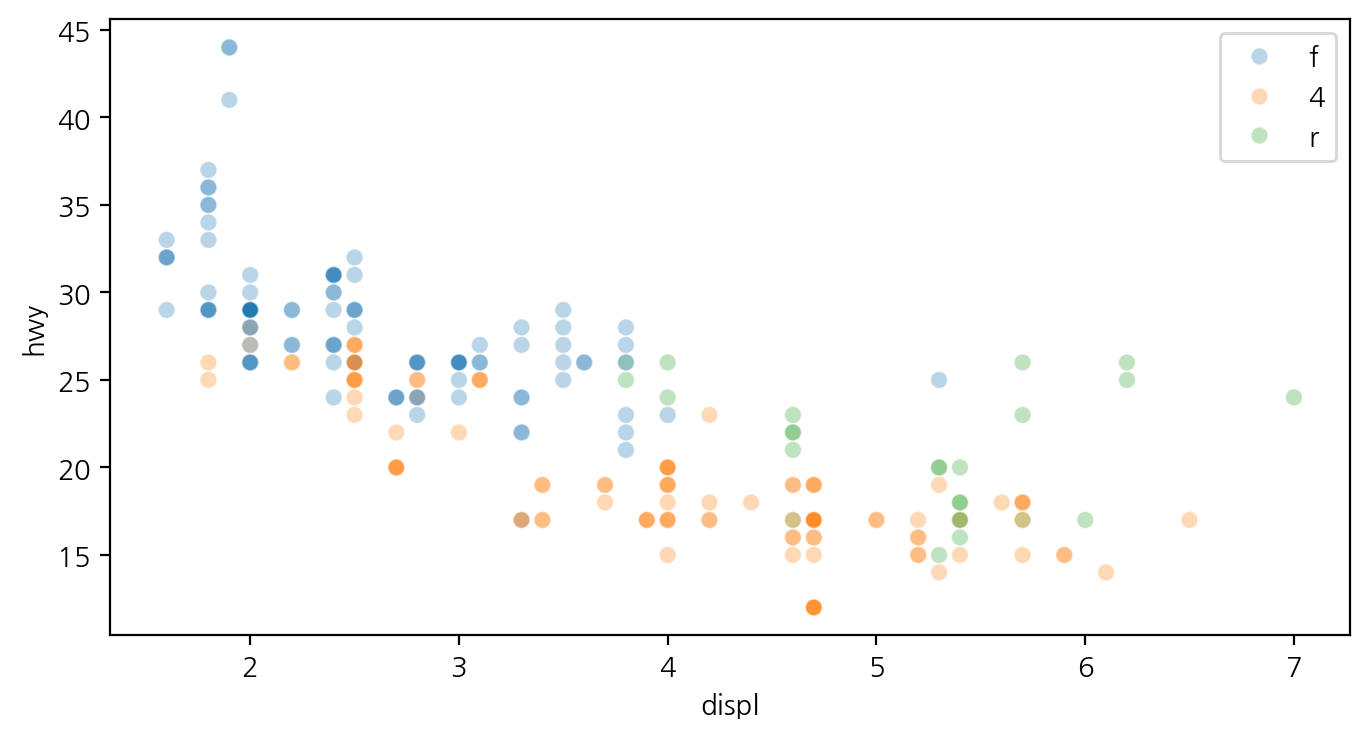

In [36]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='drv',alpha=.3)
plt.legend(loc='upper right')

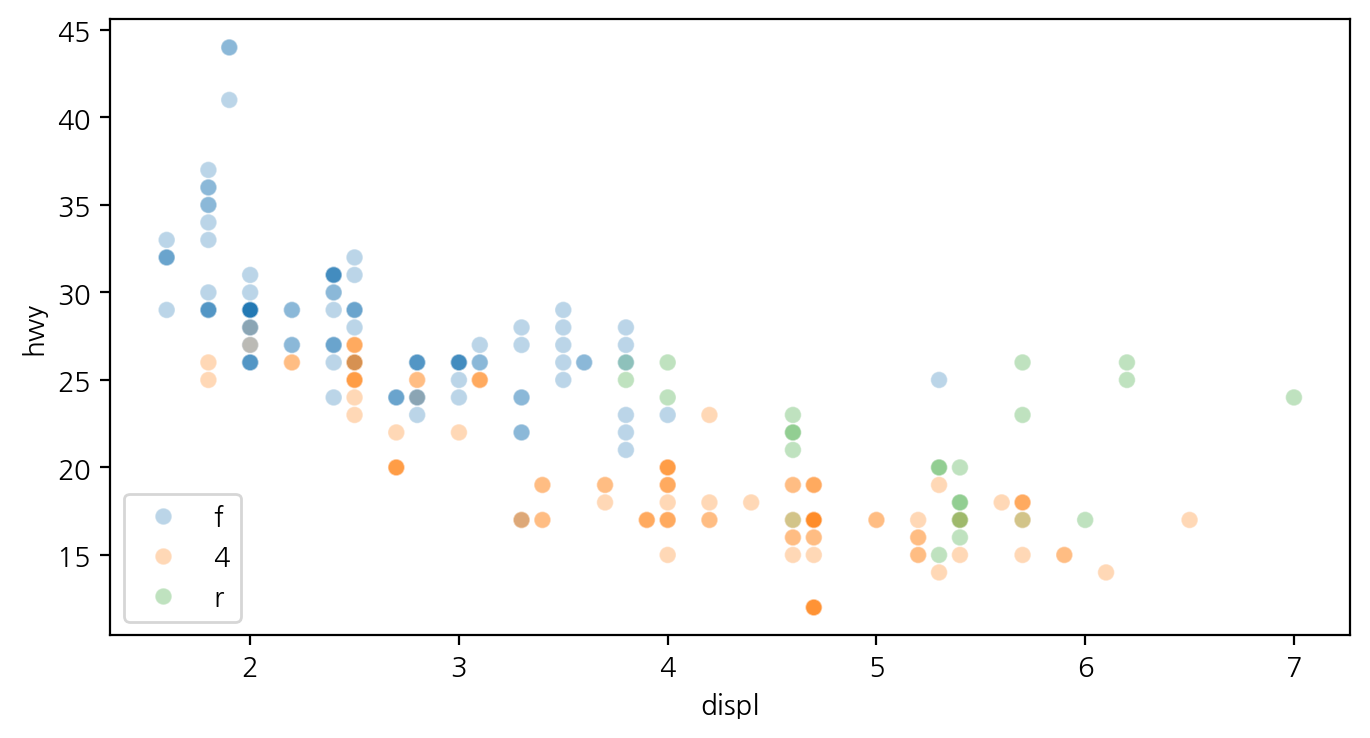

In [37]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='drv',alpha=.3)
plt.legend(loc=3)

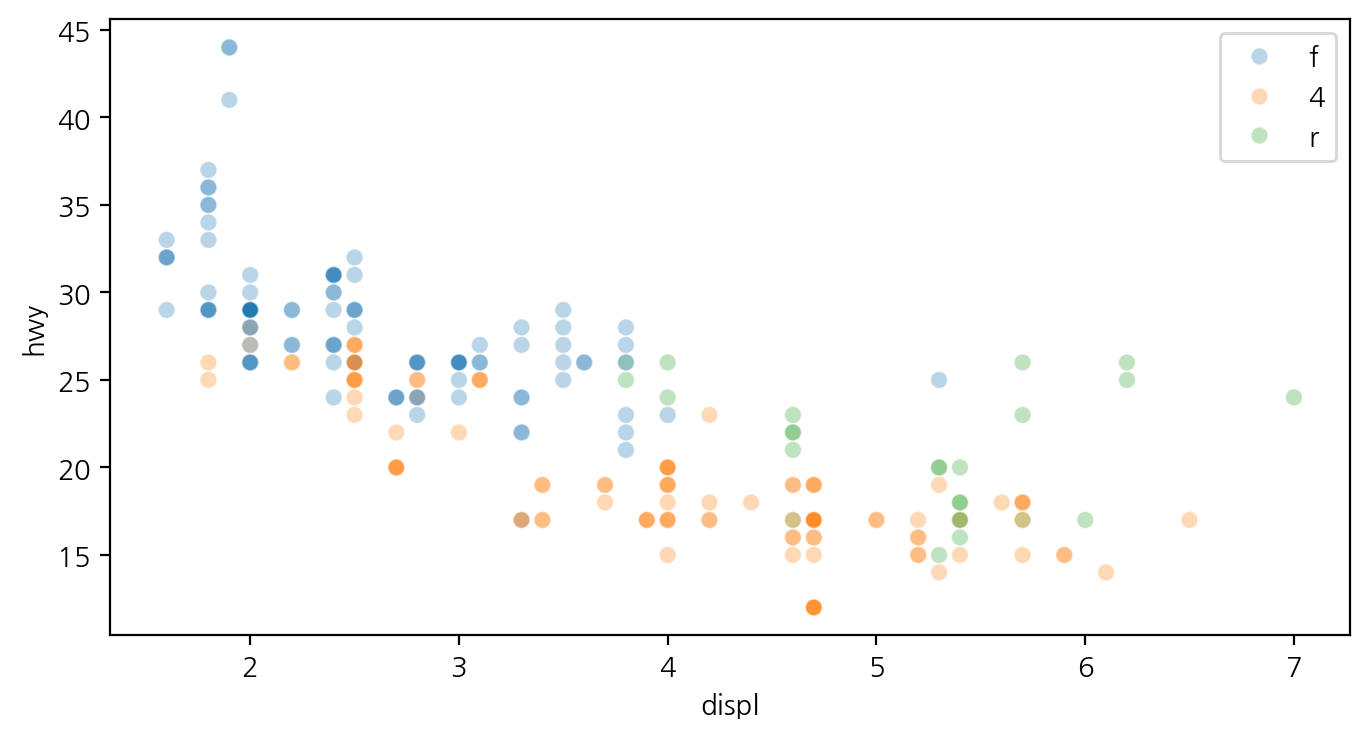

In [38]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='drv',alpha=.3)
plt.legend(loc='best')

| 숫자 | 문자열 표현         | 위치 설명           |
| -- | -------------- | --------------- |
| 0  | 'best'         | 가장 적절한 위치 자동 선택 |
| 1  | 'upper right'  | 오른쪽 위           |
| 2  | 'upper left'   | 왼쪽 위            |
| 3  | 'lower left'   | 왼쪽 아래           |
| 4  | 'lower right'  | 오른쪽 아래          |
| 5  | 'right'        | 오른쪽 중앙          |
| 6  | 'center left'  | 왼쪽 중앙           |
| 7  | 'center right' | 오른쪽 중앙          |
| 8  | 'lower center' | 아래 중앙           |
| 9  | 'upper center' | 위쪽 중앙           |
| 10 | 'center'       | 그래프 중앙          |


<Axes: xlabel='displ', ylabel='hwy'>

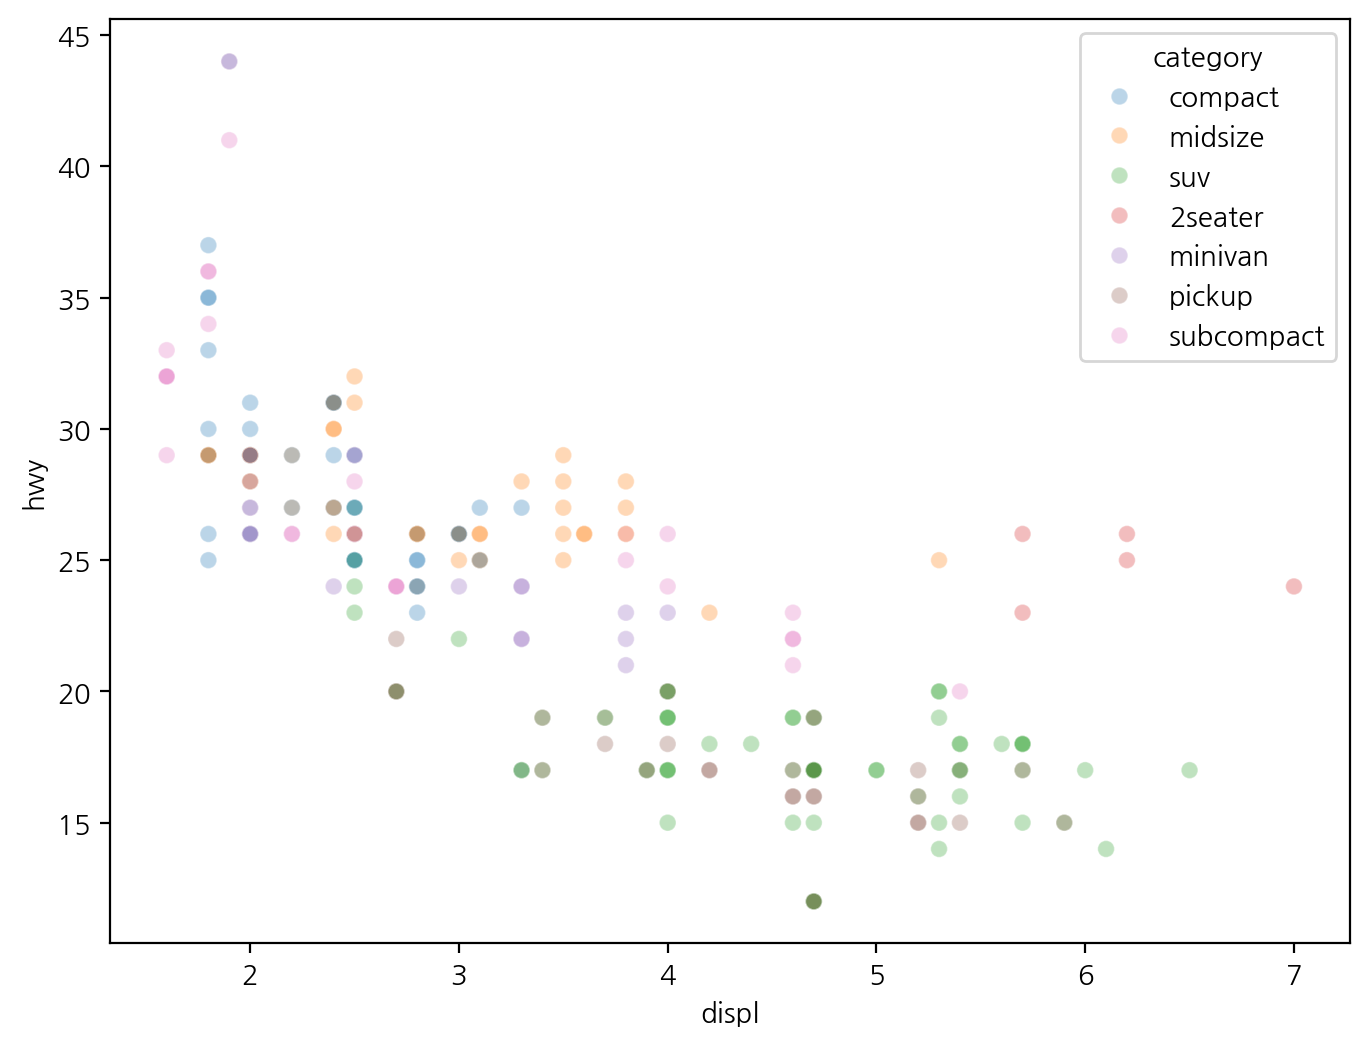

In [31]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='category',alpha=.3)

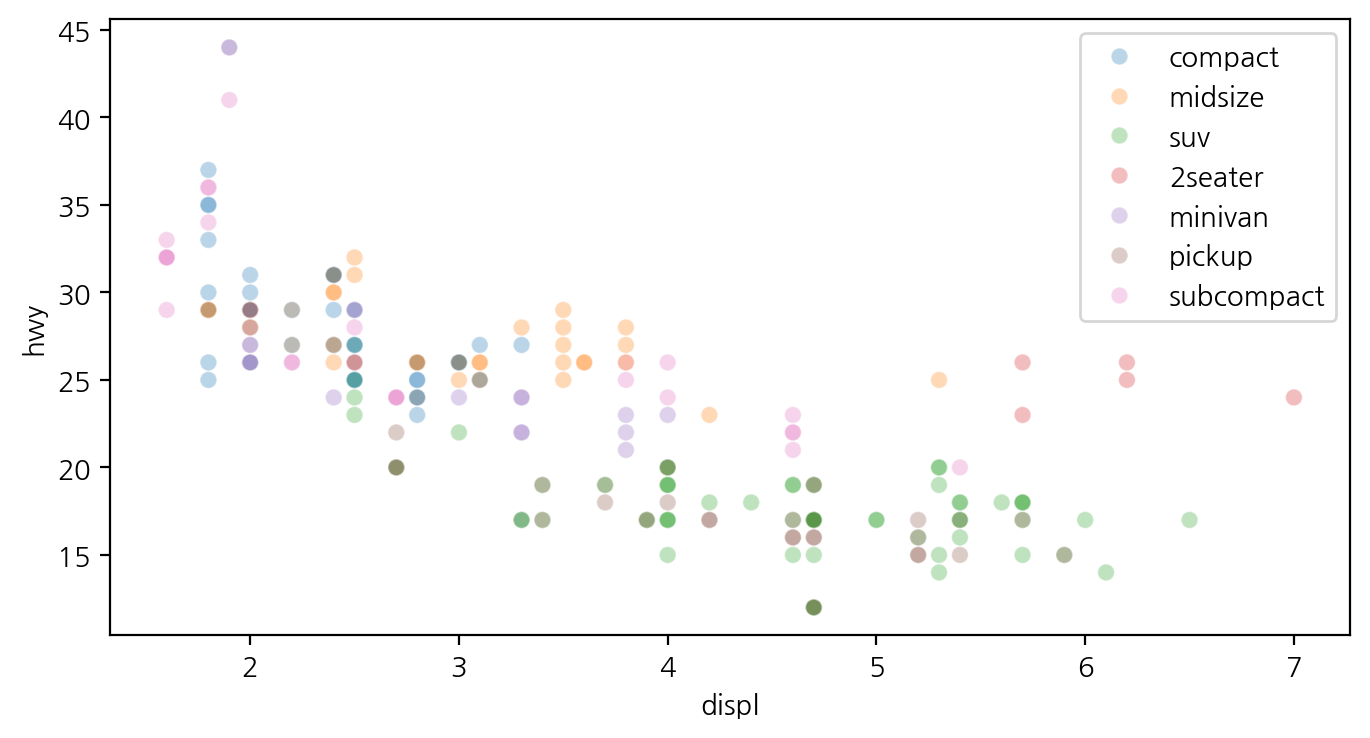

In [33]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='category',alpha=.3)
plt.legend(loc='upper right')

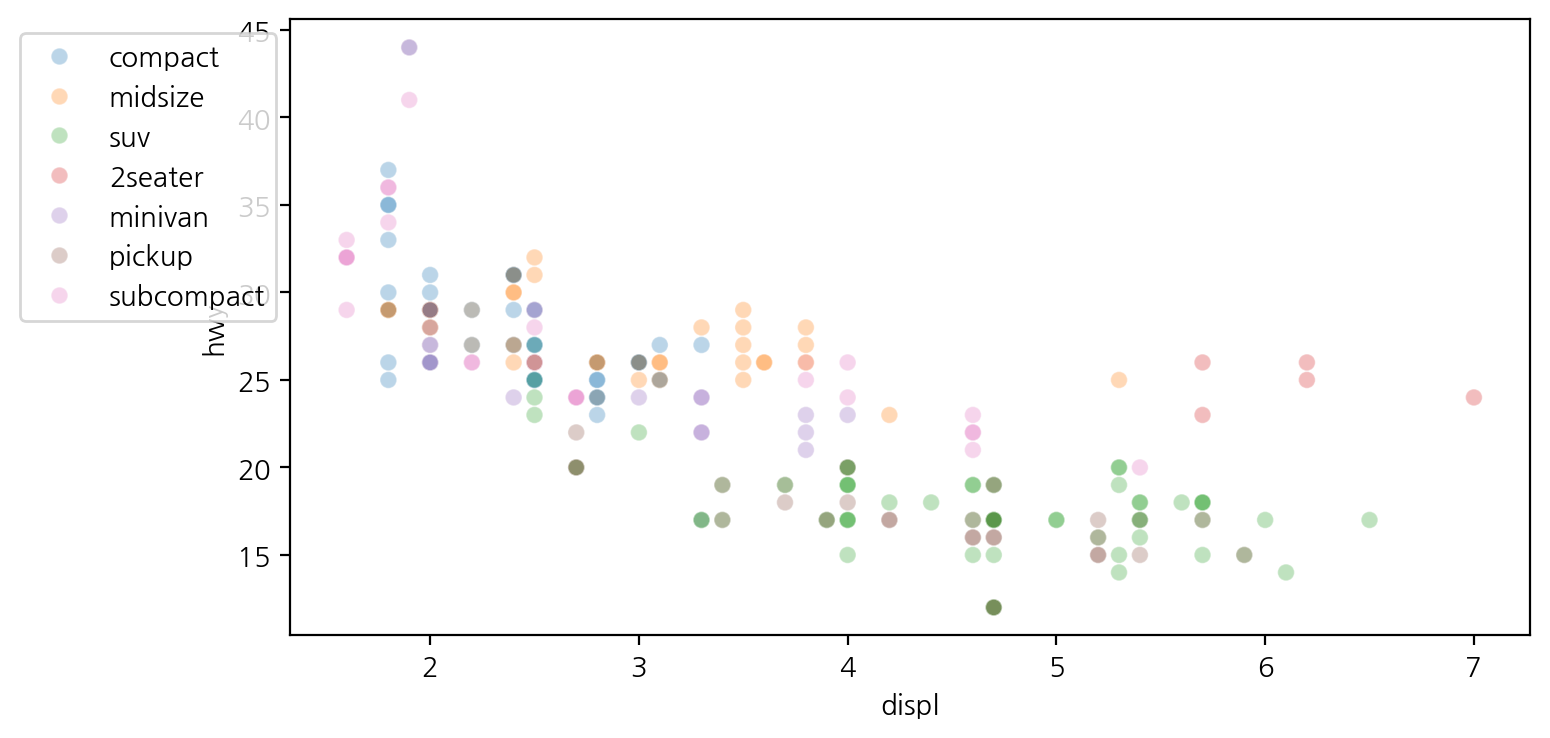

In [41]:
sns.scatterplot(data=mpg, x='displ',y='hwy', hue='category',alpha=.3)
plt.legend(loc='upper right', bbox_to_anchor=(0,1))

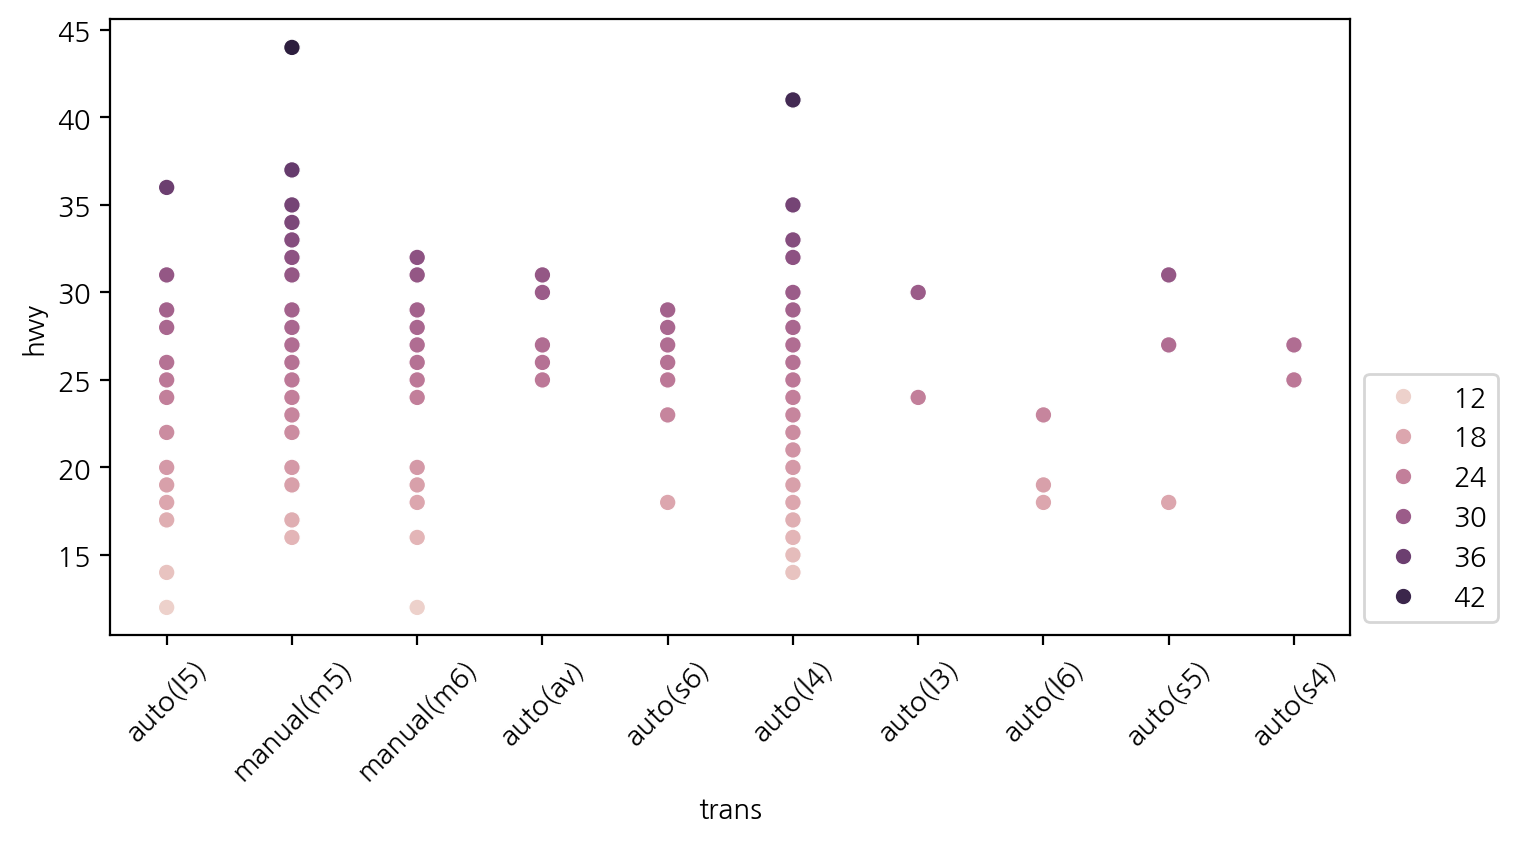

In [46]:
myPlot=sns.scatterplot(data=mpg, x='trans',y='hwy', hue='hwy')
myPlot.tick_params(axis='x', rotation=45)
myPlot.legend(loc='lower left', bbox_to_anchor=(1,0))

In [47]:
df_mpg = mpg.groupby('drv').agg(mean_hwy=('hwy','mean'))
df_mpg

,mean_hwy
drv,
4,19.17
f,28.16
r,21.00


In [ ]:
df_mpg = mpg.groupby('drv'       ).agg(mean_hwy=('hwy','mean'))
df_mpg

<Axes: xlabel='drv', ylabel='mean_hwy'>

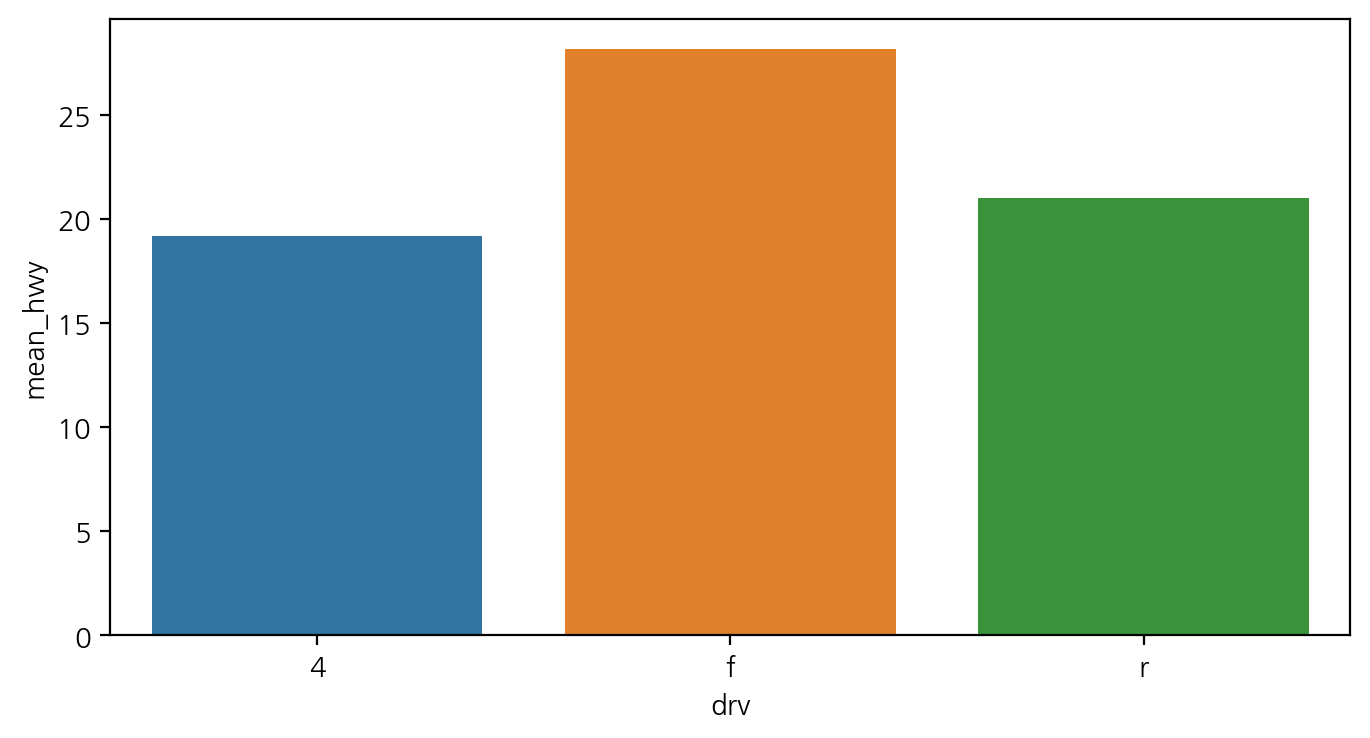

In [48]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv')

<Axes: xlabel='drv', ylabel='mean_hwy'>

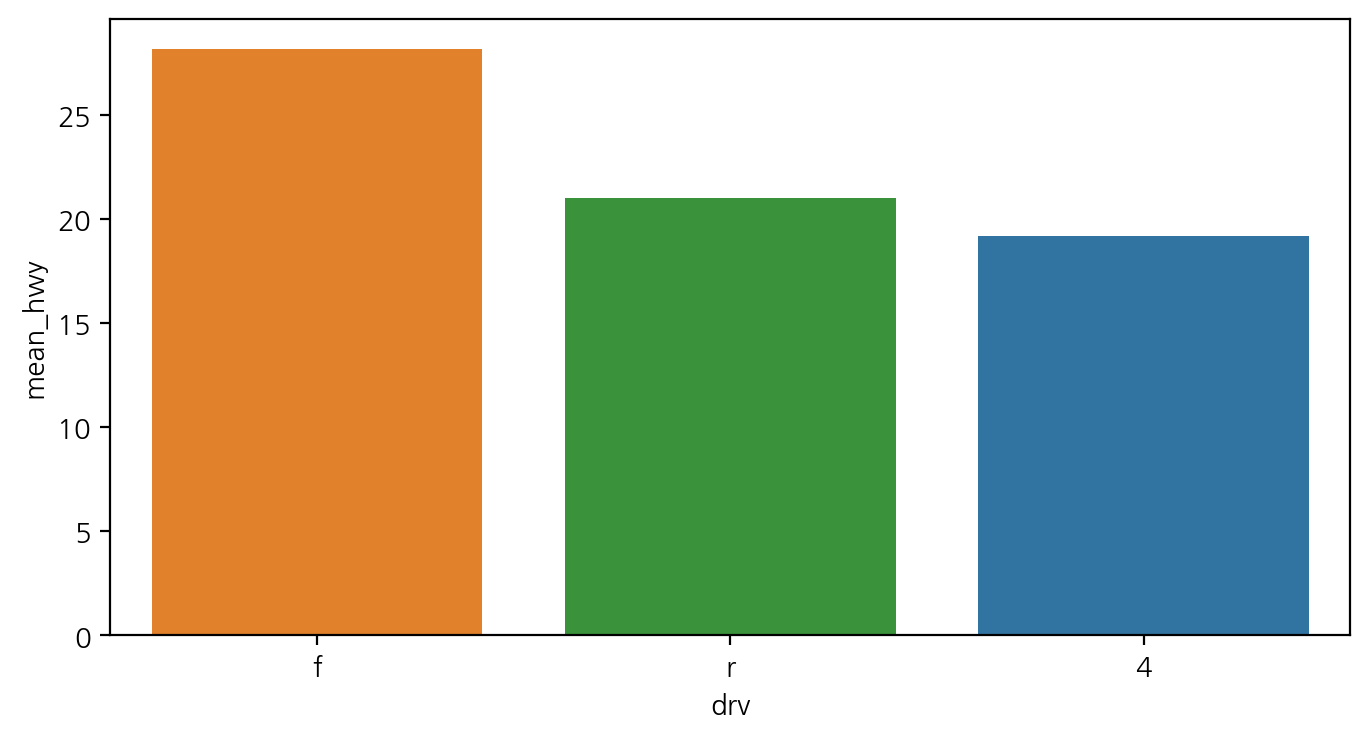

In [50]:
sns.barplot(data=df_mpg, x='drv', y='mean_hwy', hue='drv', order=['f','r','4'])

<Axes: xlabel='drv', ylabel='hwy'>

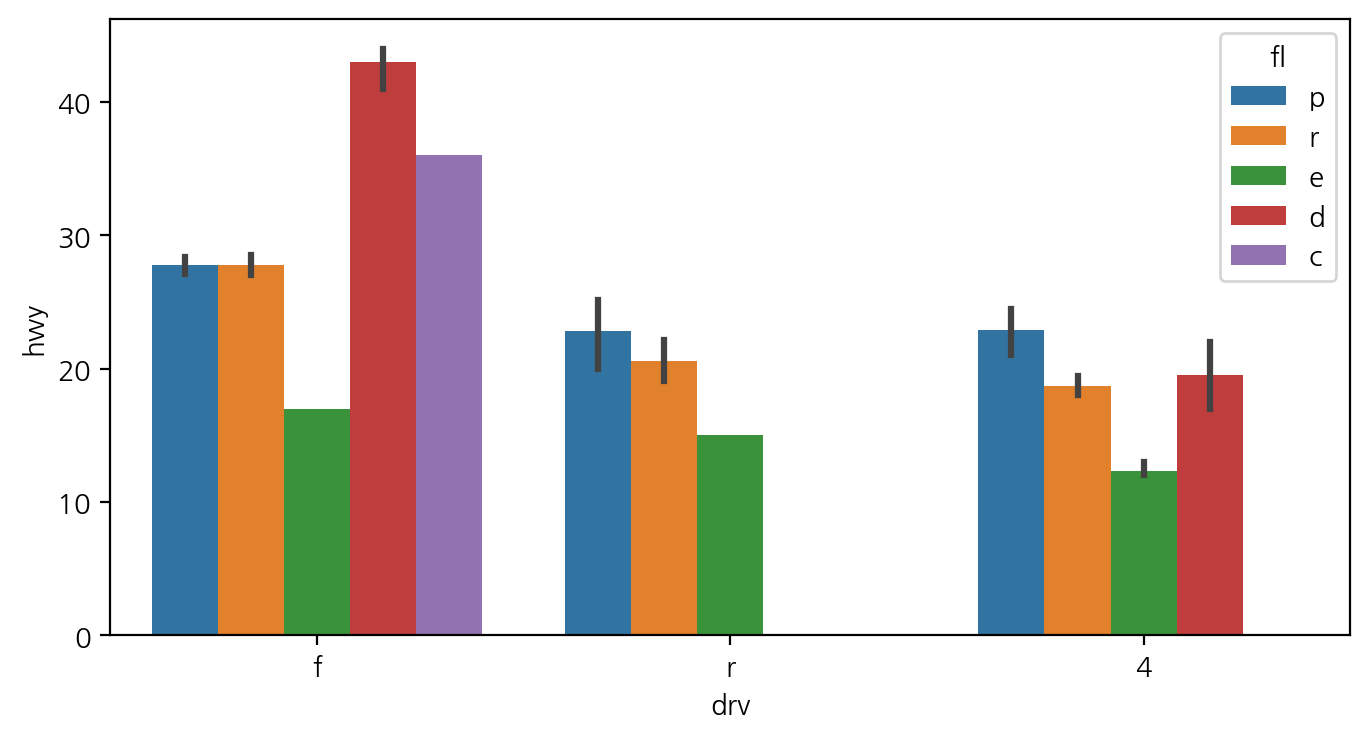

In [51]:
sns.barplot(data=mpg, x='drv', y='hwy', hue='fl', order=['f','r','4'])

In [52]:
mpg.groupby('drv',as_index=False).count()[['drv','model']]

,drv,model
0,4,103
1,f,106
2,r,25


In [53]:
mpg.groupby('drv',as_index=False).count()[['drv','model']].rename(columns={'model':'count'})

,drv,count
0,4,103
1,f,106
2,r,25


In [57]:
df_mpg=mpg.groupby('drv',as_index=False).agg(n=('drv','count'))
df_mpg

,drv,n
0,4,103
1,f,106
2,r,25


<Axes: xlabel='drv', ylabel='n'>

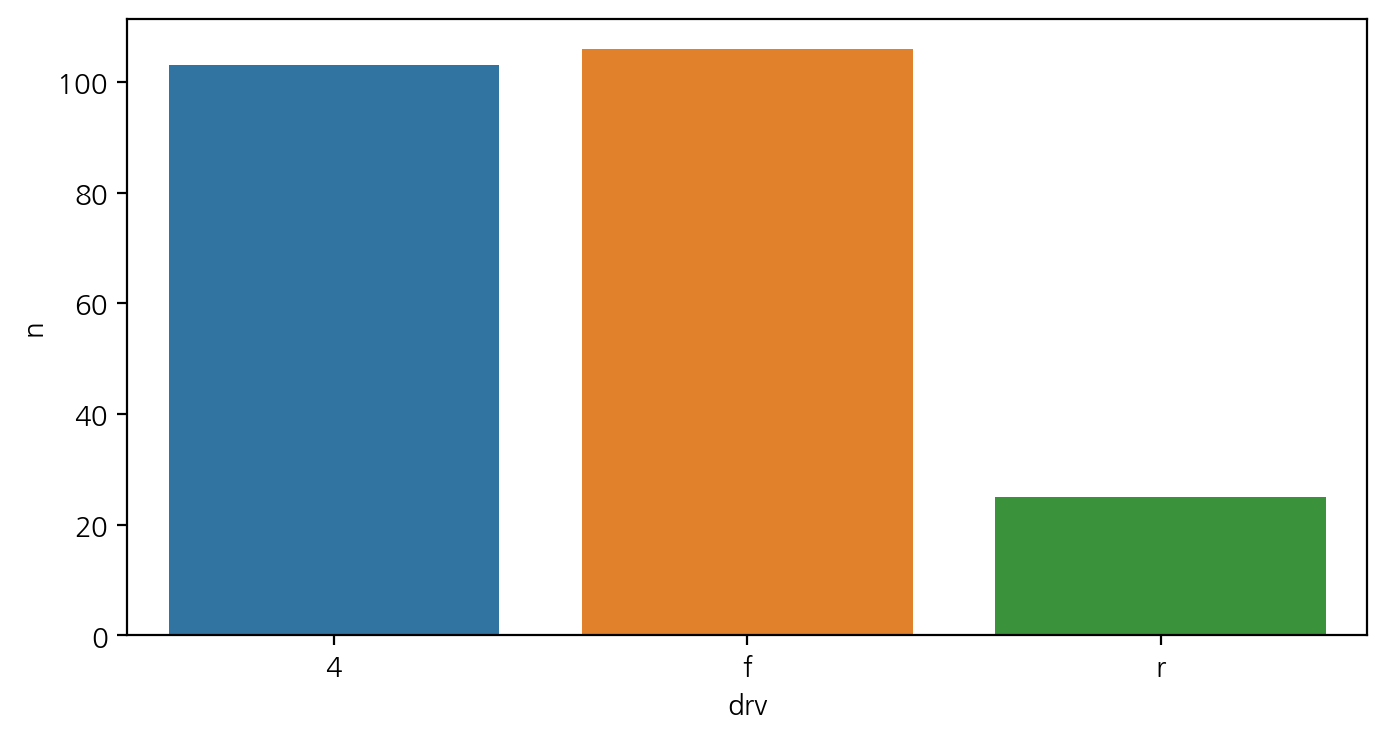

In [58]:
sns.barplot(df_mpg, x='drv', y='n', hue='drv')

<Axes: xlabel='drv', ylabel='count'>

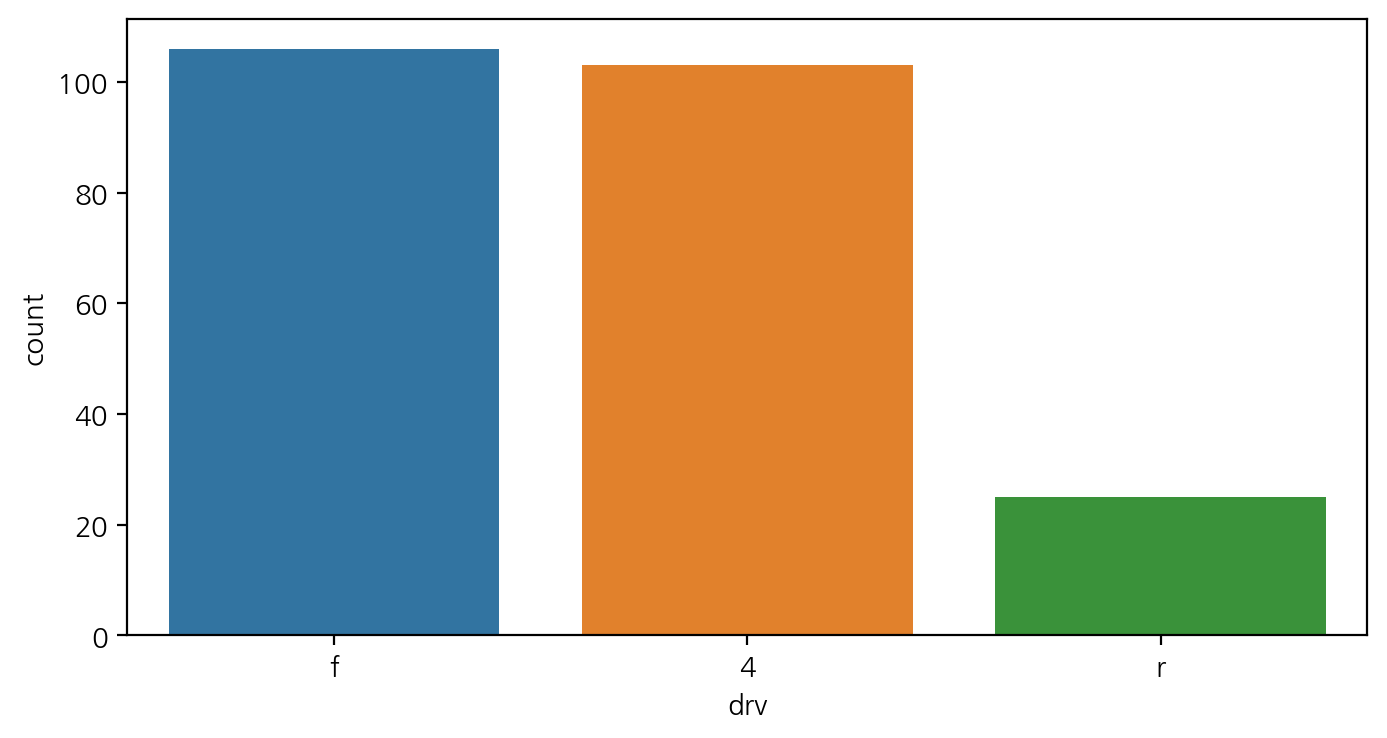

In [61]:
sns.countplot(data=mpg, x='drv', hue='drv')

In [66]:
mpg.drv.value_counts().index

Index(['f', '4', 'r'], dtype='object', name='drv')

<Axes: xlabel='drv', ylabel='count'>

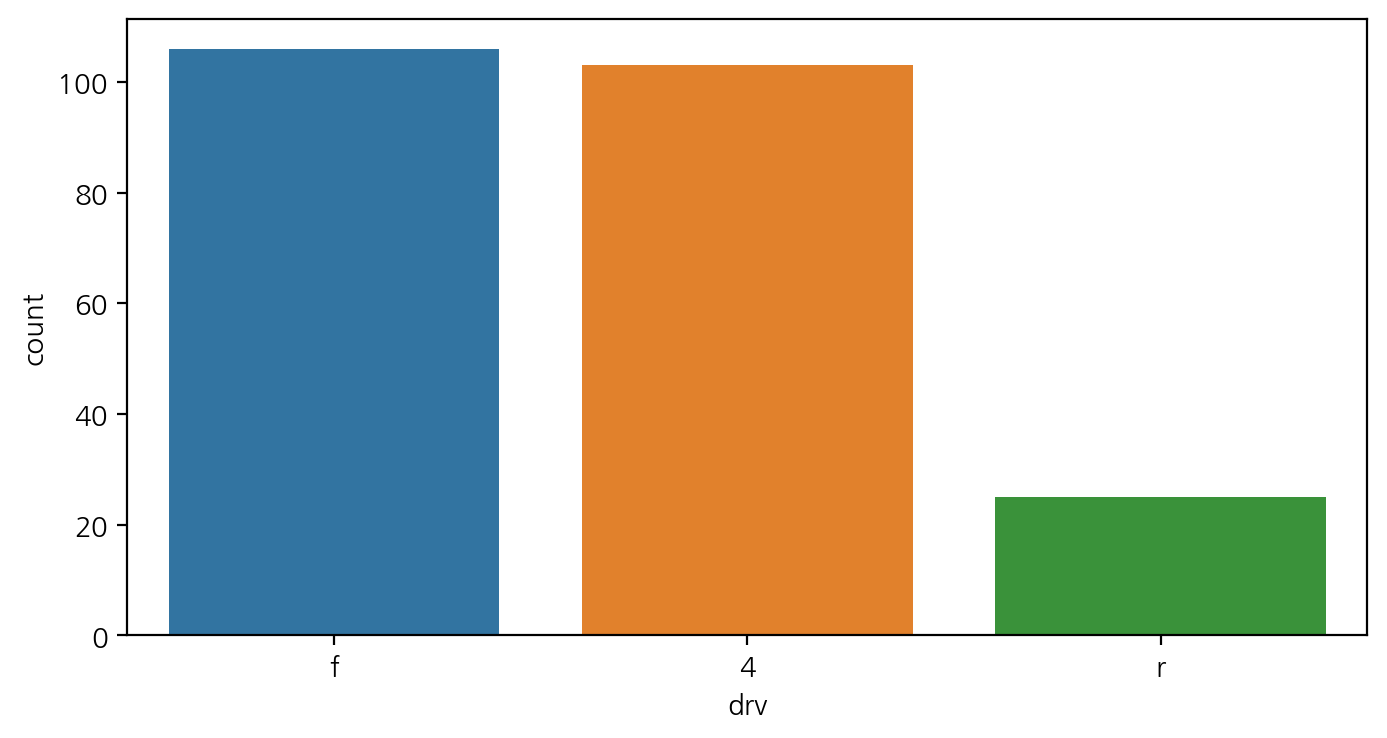

In [67]:
sns.countplot(data=mpg, x='drv', hue='drv', order=mpg.drv.value_counts().index)

In [68]:
!rm -r data

In [69]:
!git clone https://github.com/ai7dnn/data

Cloning into 'data'...
remote: Enumerating objects: 27, done.
remote: Counting objects: 100% (27/27), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 27 (delta 5), reused 0 (delta 0), pack-reused 0 (from 0)
Receiving objects: 100% (27/27), 2.15 MiB | 4.53 MiB/s, done.
Resolving deltas: 100% (5/5), done.


In [70]:
eco = pd.read_csv('data/economics.csv')
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [71]:
eco.head(5)

,date,pce,pop,psavert,uempmed,unemploy
0,1967-07-01,506.7,198712.0,12.6,4.5,2944
1,1967-08-01,509.8,198911.0,12.6,4.7,2945
2,1967-09-01,515.6,199113.0,11.9,4.6,2958
3,1967-10-01,512.2,199311.0,12.9,4.9,3143
4,1967-11-01,517.4,199498.0,12.8,4.7,3066


In [73]:
eco.shape

(574, 6)

<Axes: xlabel='date', ylabel='unemploy'>

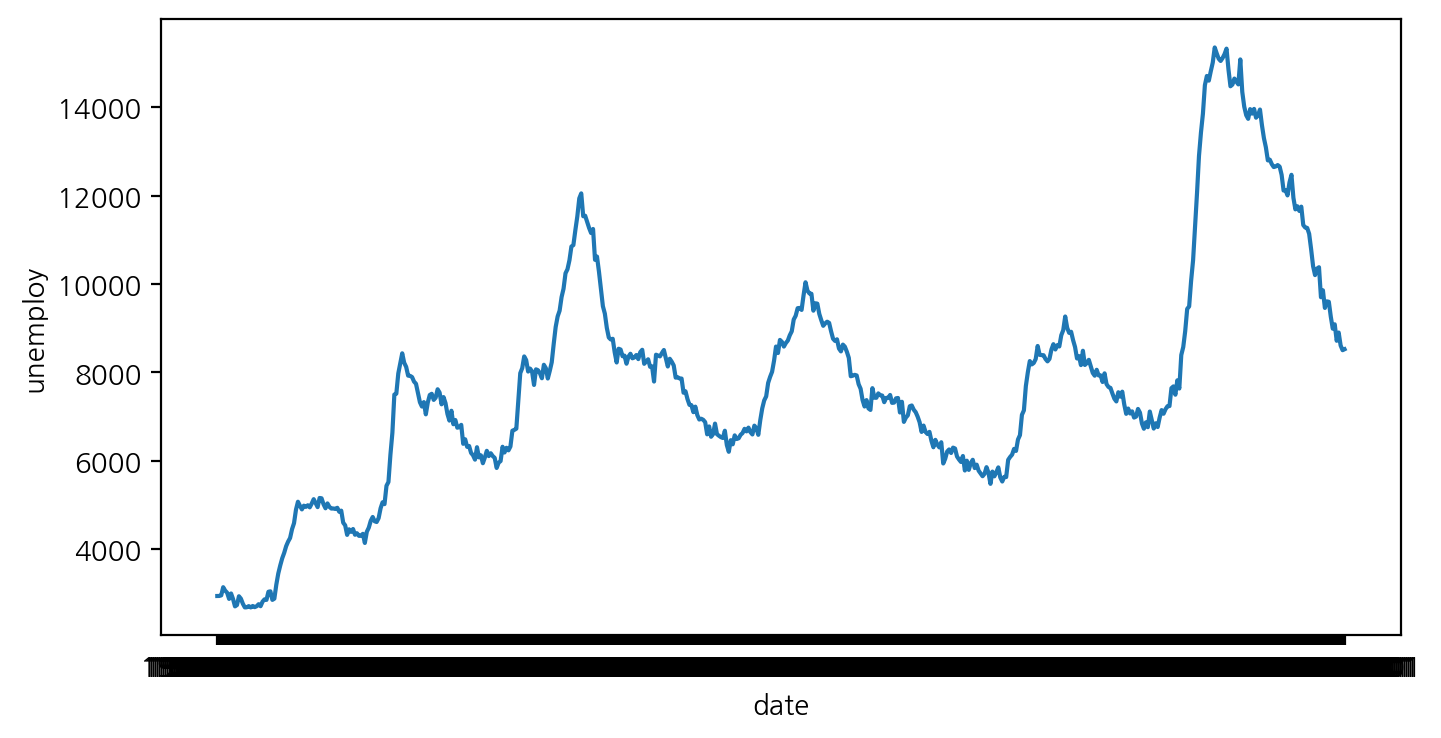

In [74]:
sns.lineplot(data=eco, x='date', y='unemploy')

<Axes: xlabel='date', ylabel='unemploy'>

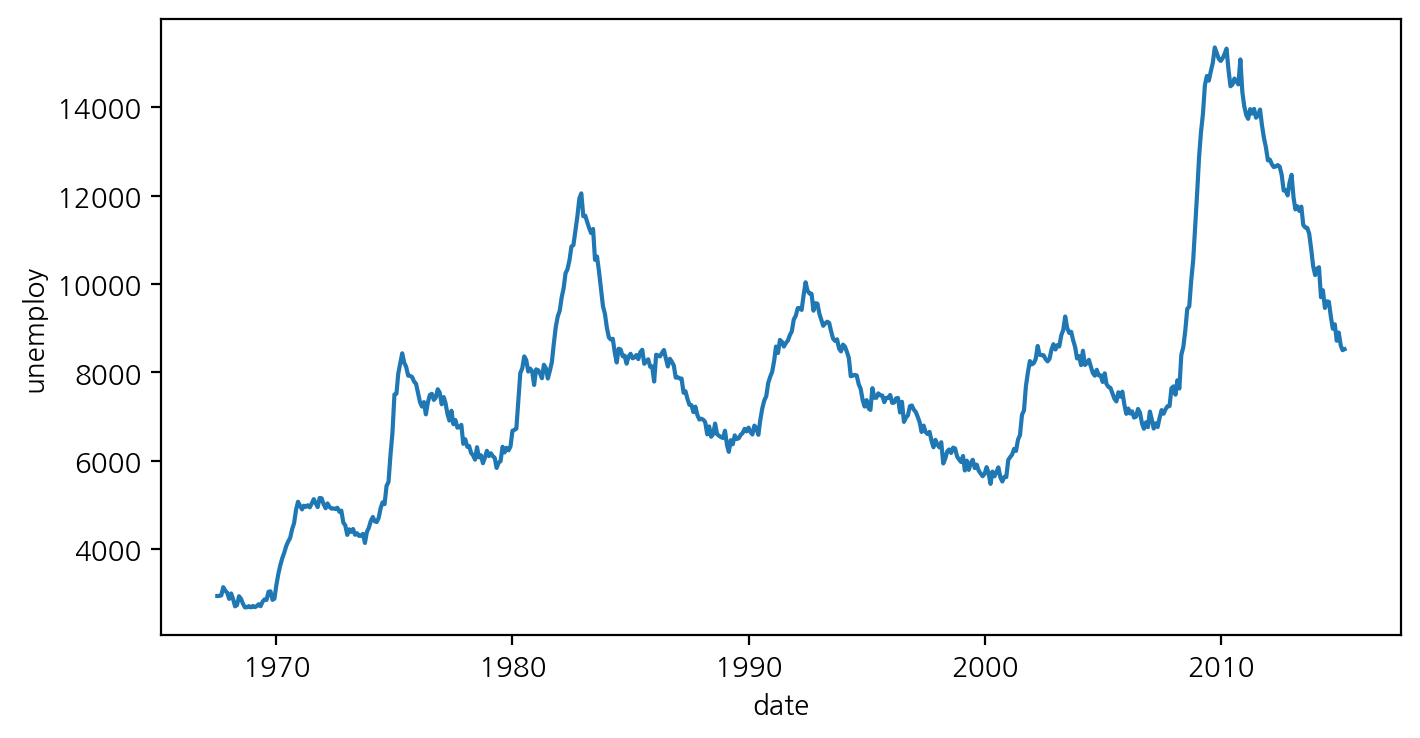

In [75]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='unemploy')

<Axes: xlabel='date', ylabel='psavert'>

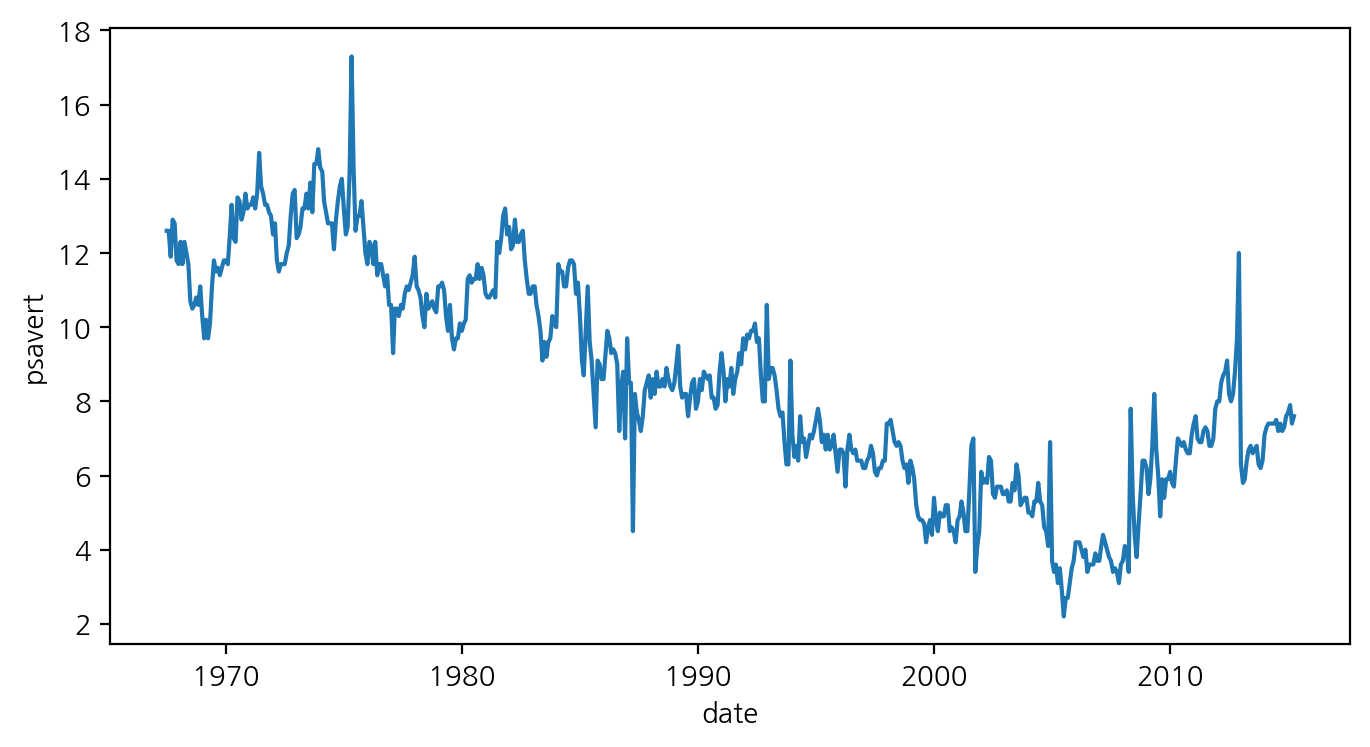

In [76]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='psavert')

<Axes: xlabel='date', ylabel='pce'>

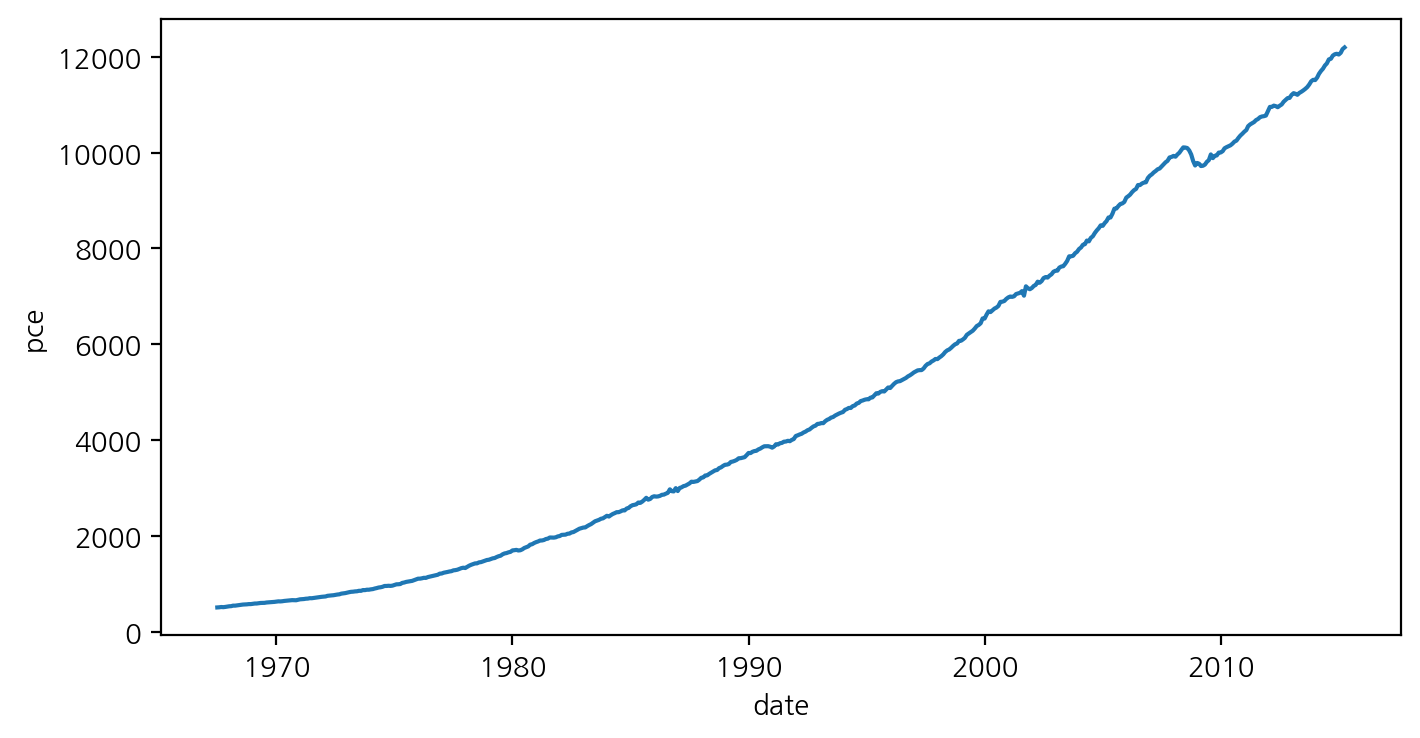

In [77]:
sns.lineplot(data=eco, x=pd.to_datetime(eco['date']), y='pce')

In [78]:
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   date      574 non-null    object 
 1   pce       574 non-null    float64
 2   pop       574 non-null    float64
 3   psavert   574 non-null    float64
 4   uempmed   574 non-null    float64
 5   unemploy  574 non-null    int64  
dtypes: float64(4), int64(1), object(1)
memory usage: 27.0+ KB


In [79]:
eco['date2'] = pd.to_datetime(eco['date'])
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), float64(4), int64(1), object(1)
memory usage: 31.5+ KB


In [80]:
eco[['date','date2']]

,date,date2
0,1967-07-01,1967-07-01
1,1967-08-01,1967-08-01
2,1967-09-01,1967-09-01
3,1967-10-01,1967-10-01
4,1967-11-01,1967-11-01
...,...,...
569,2014-12-01,2014-12-01
570,2015-01-01,2015-01-01
571,2015-02-01,2015-02-01
572,2015-03-01,2015-03-01


In [81]:
eco[['date','date2']].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype         
---  ------  --------------  -----         
 0   date    574 non-null    object        
 1   date2   574 non-null    datetime64[ns]
dtypes: datetime64[ns](1), object(1)
memory usage: 9.1+ KB


In [82]:
eco['date2'].dt.year

,date2
0,1967
1,1967
2,1967
3,1967
4,1967
...,...
569,2014
570,2015
571,2015
572,2015


In [84]:
eco['date2'].dt.month

,date2
0,7
1,8
2,9
3,10
4,11
...,...
569,12
570,1
571,2
572,3


In [85]:
eco['date'].dt.year

AttributeError: Can only use .dt accessor with datetimelike values

In [86]:
eco['year'] = eco['date2'].dt.year
eco['month'] = eco['date2'].dt.month
eco.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 574 entries, 0 to 573
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype         
---  ------    --------------  -----         
 0   date      574 non-null    object        
 1   pce       574 non-null    float64       
 2   pop       574 non-null    float64       
 3   psavert   574 non-null    float64       
 4   uempmed   574 non-null    float64       
 5   unemploy  574 non-null    int64         
 6   date2     574 non-null    datetime64[ns]
 7   year      574 non-null    int32         
 8   month     574 non-null    int32         
dtypes: datetime64[ns](1), float64(4), int32(2), int64(1), object(1)
memory usage: 36.0+ KB


<Axes: xlabel='year', ylabel='unemploy'>

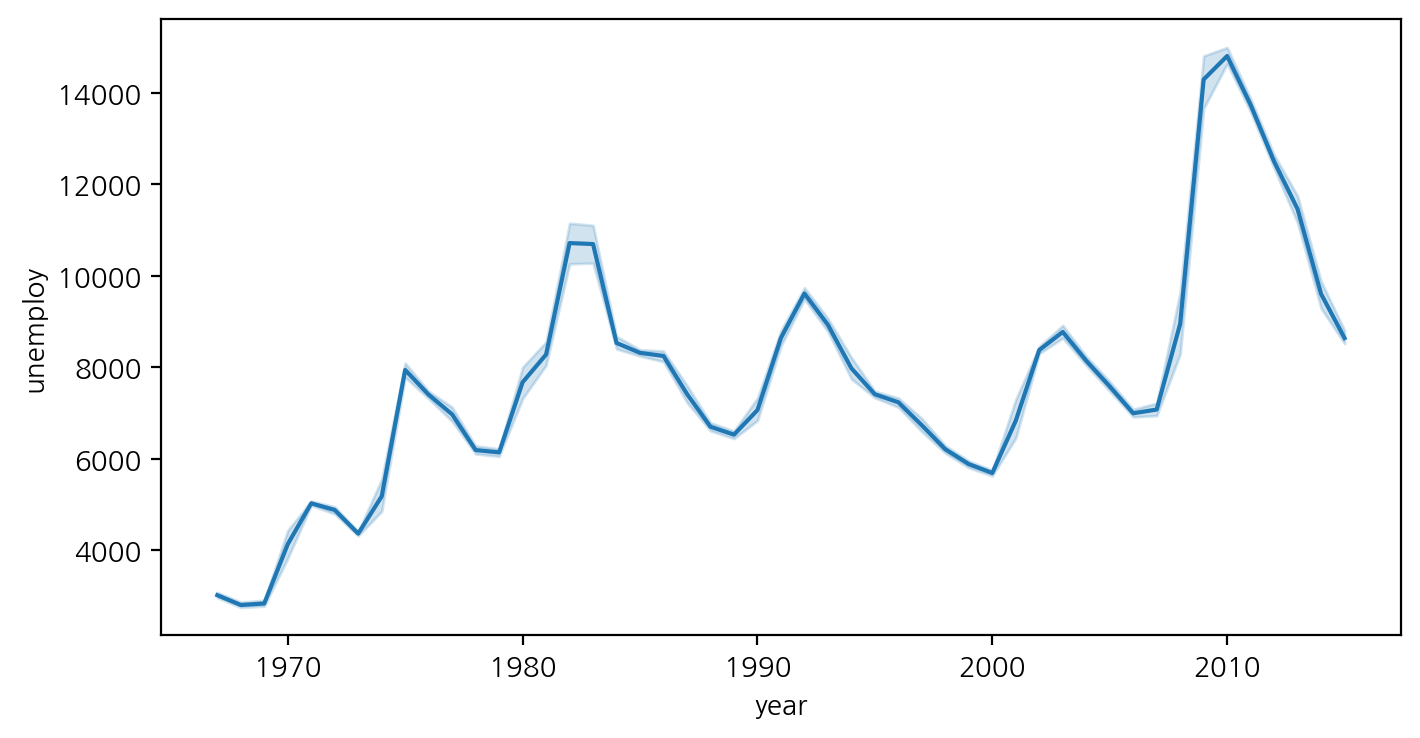

In [87]:
sns.lineplot(data=eco, x='year', y='unemploy')

<Axes: xlabel='year', ylabel='unemploy'>

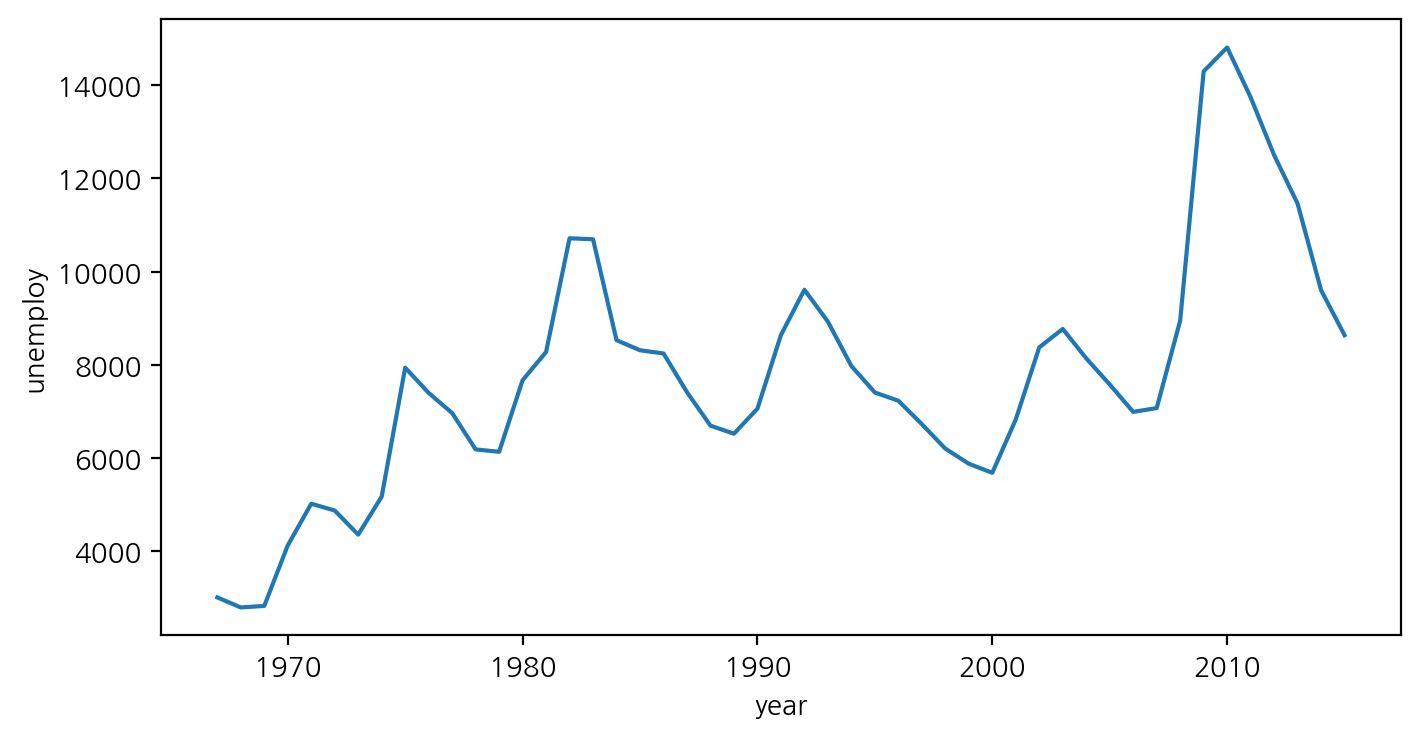

In [88]:
sns.lineplot(data=eco, x='year', y='unemploy',errorbar=None)

<Axes: xlabel='drv', ylabel='hwy'>

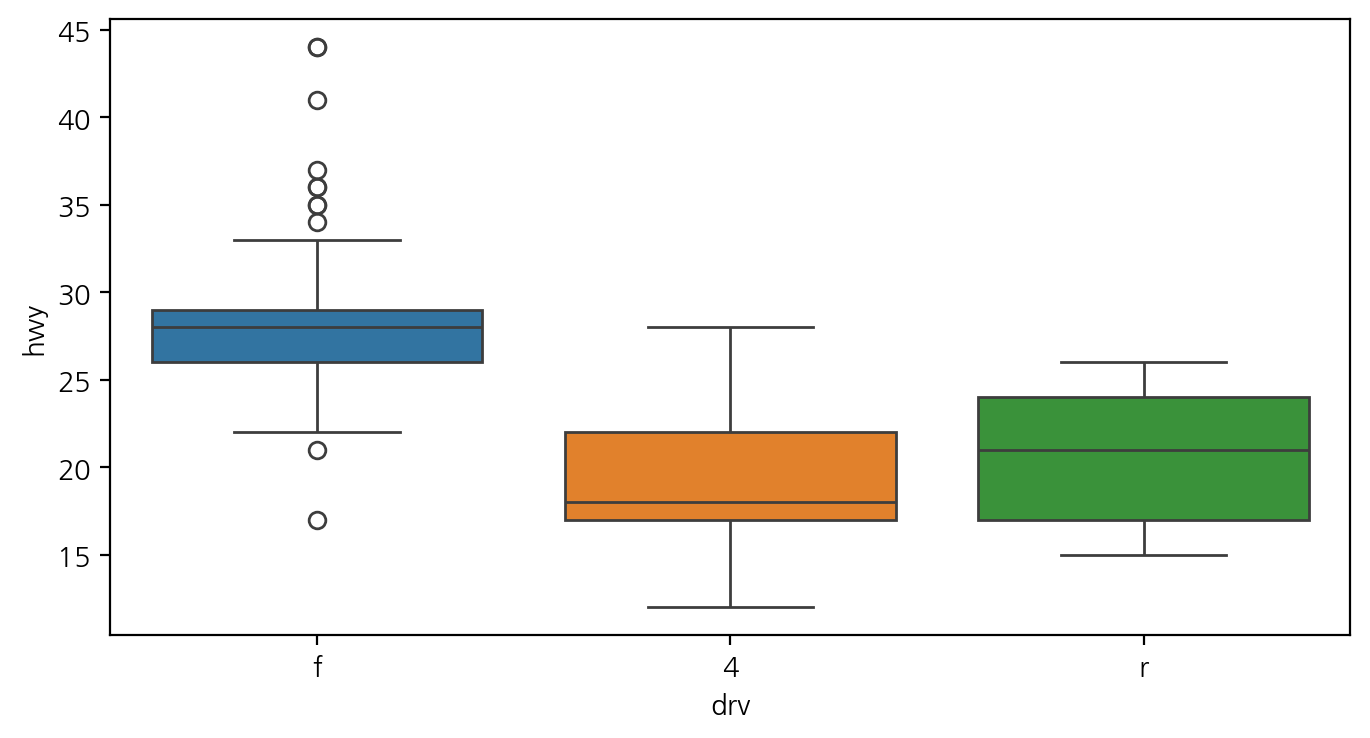

In [90]:
sns.boxplot(mpg,x='drv',y='hwy',hue='drv')

In [ ]:
plt.rcParams.update({'figure.dpi': '100'})
plt.rcParams.update({'figure.figsize': [8, 4]})

<Axes: xlabel='category', ylabel='hwy'>

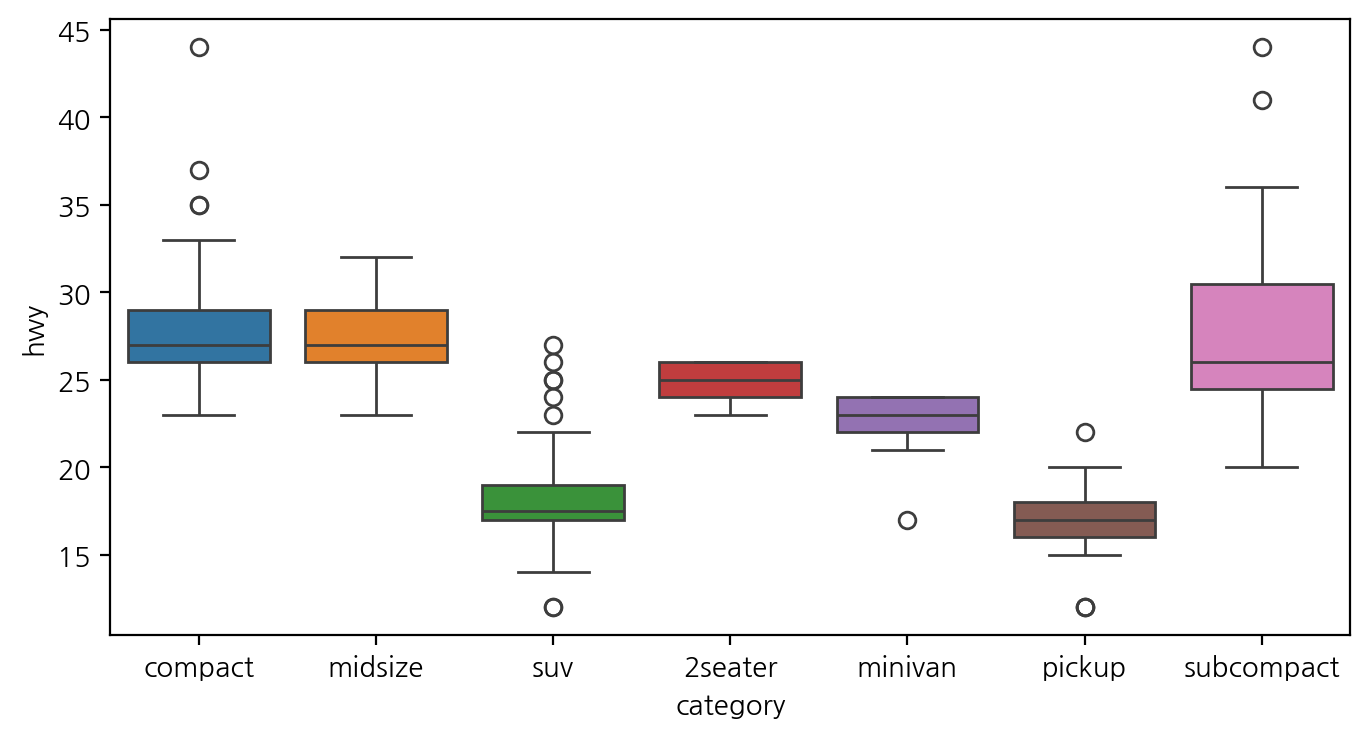

In [91]:
sns.boxplot(mpg,x='category',y='hwy',hue='category')

<Axes: xlabel='fl', ylabel='cty'>

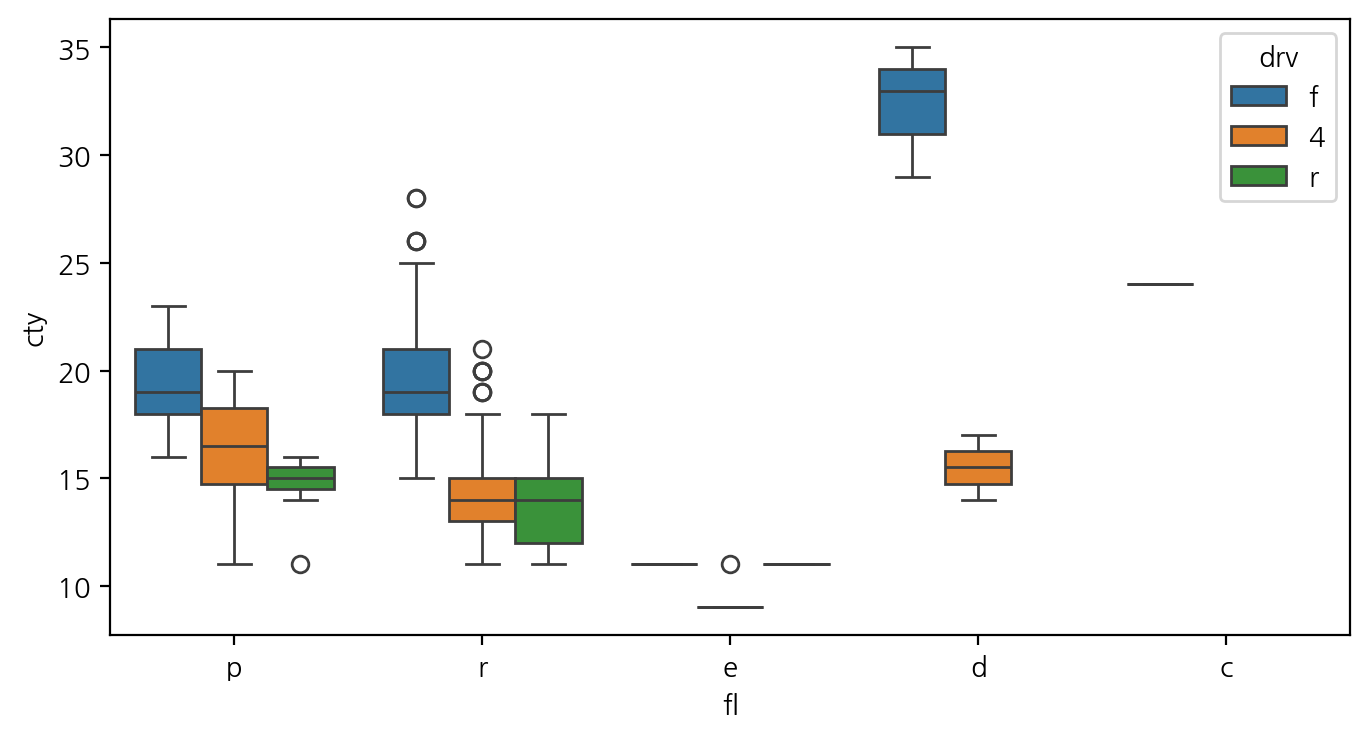

In [92]:
sns.boxplot(mpg,x='fl',y='cty',hue='drv')

In [93]:
mpg.query('fl=="e"')

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


In [94]:
mpg[mpg.fl=="e"]

,manufacturer,model,displ,year,cyl,trans,drv,cty,hwy,fl,category
19,chevrolet,c1500 suburban 2wd,5.3,2008,8,auto(l4),r,11,15,e,suv
29,chevrolet,k1500 tahoe 4wd,5.3,2008,8,auto(l4),4,11,14,e,suv
43,dodge,caravan 2wd,3.3,2008,6,auto(l4),f,11,17,e,minivan
54,dodge,dakota pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
59,dodge,durango 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv
65,dodge,ram 1500 pickup 4wd,4.7,2008,8,auto(l5),4,9,12,e,pickup
69,dodge,ram 1500 pickup 4wd,4.7,2008,8,manual(m6),4,9,12,e,pickup
126,jeep,grand cherokee 4wd,4.7,2008,8,auto(l5),4,9,12,e,suv


<Axes: xlabel='category', ylabel='hwy'>

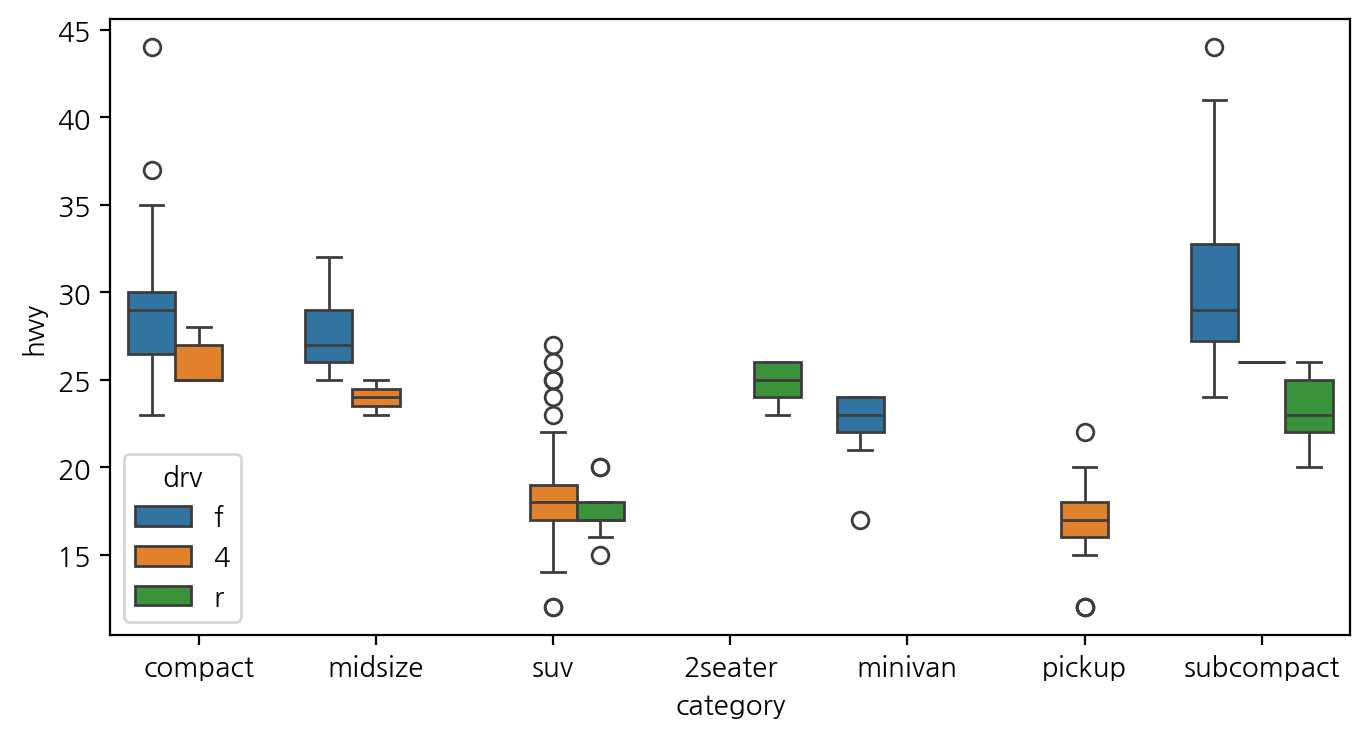

In [95]:
sns.boxplot(mpg, x='category', y='hwy',hue='drv')

<Axes: xlabel='drv', ylabel='hwy'>

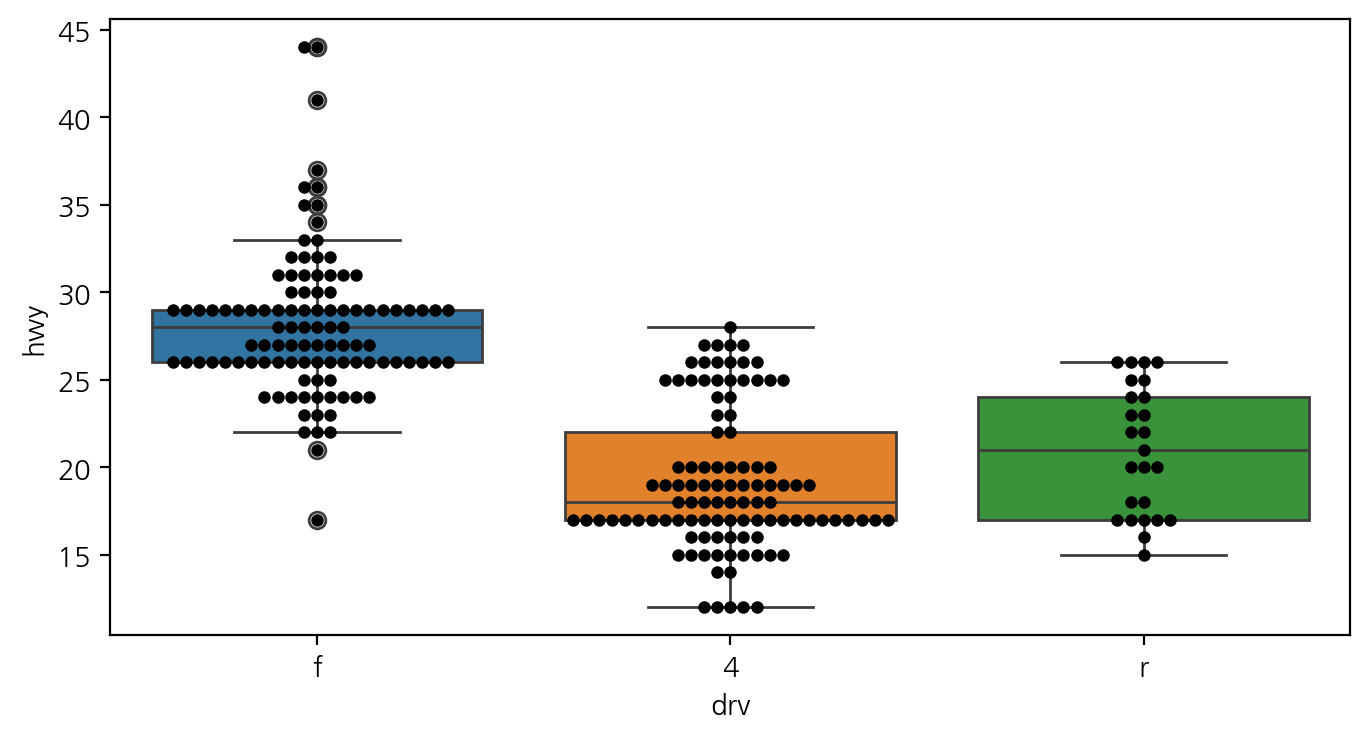

In [103]:
sns.boxplot(mpg, x='drv', y='hwy', hue='drv')
sns.swarmplot(mpg,x='drv',y='hwy',size=4.5, color='black')

In [104]:
from IPython.display import display_html
def display_side_by_side(*args):
  ##여러 데이터프레임 비교가 쉽게 옆쪽으로 표시한다##
    html_str=''
    for df in args:
        html_str+=df.to_html()
    display_html(html_str.replace('table','table style="display:inline"'),raw=True)

In [106]:
import pandas as pd

test1 = pd.DataFrame({'id': [1,2,3,4,5],
                      'midterm': [60,80,70,90,85]})
test2 = pd.DataFrame({'id': [1,2,3,6,7],
                      'final': [70,83,65,95,80]})

In [107]:
display_side_by_side(test1, test2)

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


In [108]:
display_side_by_side(test1, test2, test1.merge(test2, on='id'))

,id,midterm
0,1,60
1,2,80
2,3,70
3,4,90
4,5,85
,id,final
0,1,70
1,2,83
2,3,65
3,6,95


##08단원 종료
